In [1]:
#常规操作
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('task1_data.csv')
S1 = data.loc[:,'尺寸1']
S2 = data.loc[:,'尺寸2']
y = data.loc[:,'y']
data.head()

,尺寸1,尺寸2,y
0,-1.78680,-0.943606,1
1,-1.52284,-1.048610,1
2,-1.31980,-1.324320,1
3,-1.29949,-0.536819,1
4,-1.19797,-0.845908,1


In [2]:
print(S1)

0    -1.78680
1    -1.52284
2    -1.31980
3    -1.29949
4    -1.19797
       ...   
95    1.60446
96    1.74325
97    1.74449
98    1.98679
99    2.00533
Name: 尺寸1, Length: 100, dtype: float64


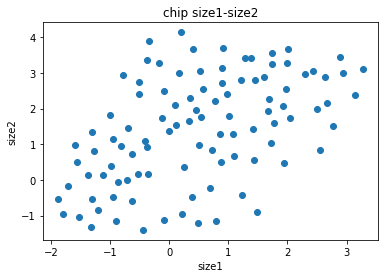

In [3]:
# visualize data
fig1 = plt.figure()
plt.scatter(S1,S2)
plt.title('chip size1-size2')
plt.xlabel('size1')
plt.ylabel('size2')
plt.show()

In [4]:
#boolean variable mask
result = y == 1
print(result)

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: y, Length: 100, dtype: bool


Text(0, 0.5, 'size2')

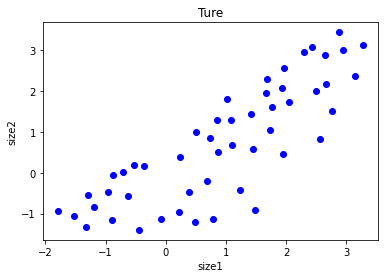

In [5]:
#仅提取result特征为TURE的数据
fig_t = plt.figure()
plt.scatter(S1[result],S2[result],c='b')
plt.title('Ture')
plt.xlabel('size1')
plt.ylabel('size2')

Text(0, 0.5, 'size2')

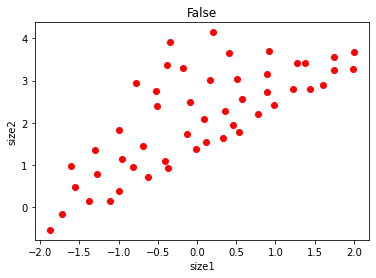

In [6]:
#仅提取result特征为False的数据
fig_f = plt.figure()
plt.scatter(S1[~result],S2[~result],c='r')
plt.title('False')
plt.xlabel('size1')
plt.ylabel('size2')

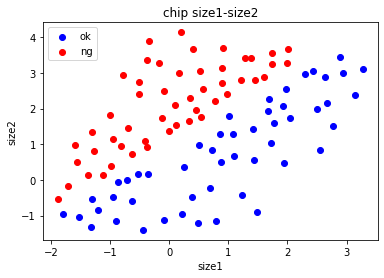

In [7]:
fig4 = plt.figure()
ok = plt.scatter(S1[result],S2[result],c='b')
ng = plt.scatter(S1[~result],S2[~result],c='r')
plt.title('chip size1-size2')
plt.legend((ok,ng),('ok','ng'))
plt.xlabel('size1')
plt.ylabel('size2')
plt.show()



In [8]:
#获取input
x = data.drop(['y'],axis=1)
x.head()

,尺寸1,尺寸2
0,-1.78680,-0.943606
1,-1.52284,-1.048610
2,-1.31980,-1.324320
3,-1.29949,-0.536819
4,-1.19797,-0.845908


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [10]:
#模型预测
y_predict = model.predict(x)
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
#模型评估
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)
#模型表现完美

1.0


In [12]:

x_test = np.array([[1,10]])
#测试样本预测
y_test_p = model.predict(x_test)
print('良品' if y_test_p==1 else '次品')

次品


In [13]:
#获取边界函数的参数
print(model.intercept_)
print(model.coef_)

[2.7887966]
[[ 2.73058015 -2.82554755]]


In [14]:
theta0 = model.intercept_[0]
theta1, theta2 = model.coef_[0][0],model.coef_[0][1]
print('t0:',theta0,'\nt1：',theta1,'\nt2：',theta2)

t0: 2.788796596168662 
t1： 2.730580148169416 
t2： -2.825547547161019


In [15]:
print(S1)

0    -1.78680
1    -1.52284
2    -1.31980
3    -1.29949
4    -1.19797
       ...   
95    1.60446
96    1.74325
97    1.74449
98    1.98679
99    2.00533
Name: 尺寸1, Length: 100, dtype: float64


In [16]:
#计算边界函数上对应的X2
S2_new = -(theta0+theta1*S1)/theta2

print(S2_new)

0    -0.739752
1    -0.484664
2    -0.288448
3    -0.268820
4    -0.170713
        ...   
95    2.537527
96    2.671652
97    2.672851
98    2.907007
99    2.924924
Name: 尺寸1, Length: 100, dtype: float64


No handles with labels found to put in legend.
<ipython-input-17-c15c095a1205>:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7feb8fe99910>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((ok,ng, L),('ok','ng','Line'))


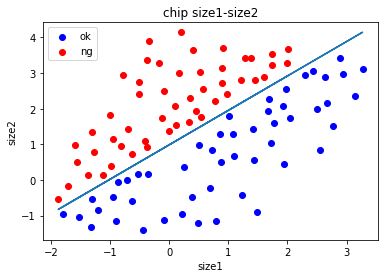

In [17]:
fig3 = plt.figure()
ok = plt.scatter(S1[result],S2[result],c='b')
ng = plt.scatter(S1[~result],S2[~result],c='r')
L = plt.plot(S1,S2_new)
plt.title('chip size1-size2')
plt.xlabel('size1')
plt.ylabel('size2')
plt.legend()
plt.legend((ok,ng, L),('ok','ng','Line'))
plt.show()
